# Trader Performance vs Market Sentiment Analysis
### By Sunayana Yadav

This project explores the relationship between Bitcoin market sentiment (Fear/Greed Index) and trader performance using Hyperliquid trading data.

**Goal**: Discover patterns between emotions (fear/greed) and actual trader PnL to guide smarter crypto trading strategies.

In [105]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#load the data
trader_data = pd.read_csv("historical_data.csv")
sentiment_data = pd.read_csv("fear_greed_index.csv")

**Data Preprocessing**

In [112]:
# Convert timestamps
trader_data['Timestamp'] = pd.to_datetime(trader_data['Timestamp'], unit='ms')
trader_data['date'] = trader_data['Timestamp'].dt.date

sentiment_data['date'] = pd.to_datetime(sentiment_data['date']).dt.date

In [118]:
#merg
merged_data = pd.merge(trader_data, sentiment_data, on='date', how='inner')

In [120]:
merged_data.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
171000,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,15.84700,44.420,703.92,BUY,14-04-2025 14:25,-2637.63000,Close Short,3.371478,0xa6451f6ccd43fe3c9e1d042184cf1e019200427dff75...,86444364540,True,0.246373,3.020000e+14,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear
116060,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,VIRTUAL,3.30750,43.800,144.87,BUY,30-12-2024 20:25,-198.00000,Close Short,8.978124,0x42a1d53d85b82dcd0212041a42bb8302022300997477...,59591603071,True,0.050703,9.890000e+14,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear
26763,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,PURR,0.22341,9123.000,2038.17,BUY,20-01-2025 14:16,-53583.00000,Close Short,86.486040,0xec67499c7dc68fce8e09041be8f618012e00646007de...,64771444394,False,0.195663,5.460000e+14,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear
6010,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,85300.00000,0.074,6312.20,SELL,15-04-2025 09:08,16.14632,Close Long,40.714800,0xc59eda89a5f9e0551f550421919c2901b300f599525c...,86618342363,False,0.000000,1.020000e+15,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear
45040,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,12.88300,155.250,2000.09,BUY,17-03-2025 04:33,0.00000,Open Long,0.000000,0x1a4dda292a7420b644b7041fb14bfd02013000d37465...,80240470430,True,0.700030,3.770000e+13,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear


**Exploratory Data Analysis (EDA)**

In [122]:
print("Shape of Merged Data:", merged_data.shape)
print(merged_data[['classification', 'Closed PnL', 'Size USD']].describe())

Shape of Merged Data: (184263, 20)
          Closed PnL      Size USD
count  184263.000000  1.842630e+05
mean       55.492690  4.780733e+03
std       937.857954  2.690428e+04
min   -117990.104100  0.000000e+00
25%         0.000000  1.875300e+02
50%         0.000000  5.927400e+02
75%         6.602400  2.032705e+03
max    135329.090100  3.509753e+06


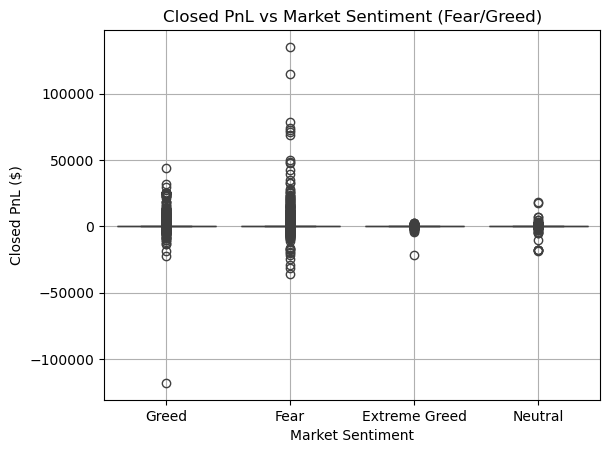

In [126]:
import os
os.makedirs("charts", exist_ok=True)

sns.boxplot(x='classification', y='Closed PnL', data=merged_data)
plt.title('Closed PnL vs Market Sentiment (Fear/Greed)')
plt.ylabel('Closed PnL ($)')
plt.xlabel('Market Sentiment')
plt.grid(True)

plt.savefig("charts/pnl_by_sentiment.png")  
plt.show()

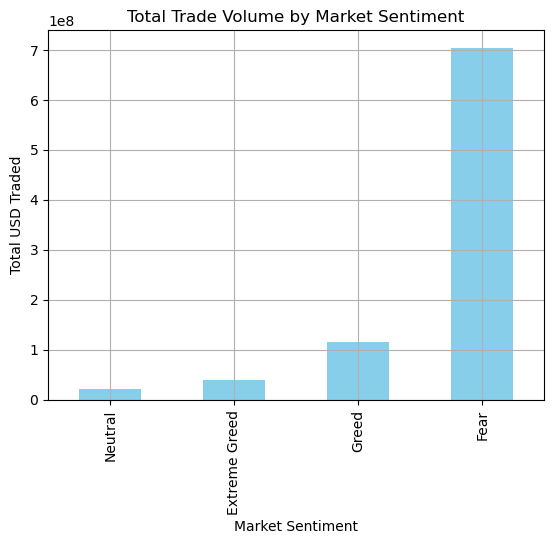

In [128]:
volume_sentiment = merged_data.groupby('classification')['Size USD'].sum().sort_values()
volume_sentiment.plot(kind='bar', color='skyblue')
plt.title('Total Trade Volume by Market Sentiment')
plt.ylabel('Total USD Traded')
plt.xlabel('Market Sentiment')
plt.grid(True)
plt.savefig("charts/volume_by_sentiment.png")
plt.show()

In [130]:
avg_pnl = merged_data.groupby('classification')['Closed PnL'].mean()
print("Average PnL by Sentiment:\n", avg_pnl)

Average PnL by Sentiment:
 classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed PnL, dtype: float64


**Key Findings:**

- Highest average profits occur on **Greed** days.
- **Fear** days have the largest volume but mixed results.
- Extreme sentiment leads to more volatility in nL.


## Conclusion

- Traders earned highest PnL on **Greed** days ($87.89).
  
- **Fear** days had highest trading volume (~$704M), with moderate average PnL.
- **Extreme sentiment** increases volatility.
- These insights can help develop better trading strategies based on market mood.
